# Load the Data (Iris)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
print(X.shape)
print(data.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Visualize

In [22]:
import pandas as pd
x_df = pd.DataFrame(X)
x_df.columns = data.feature_names
x_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
x_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


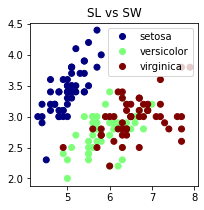

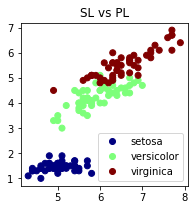

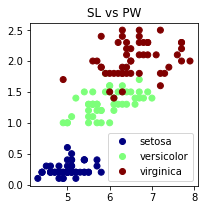

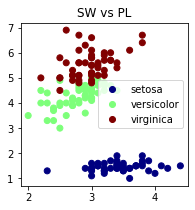

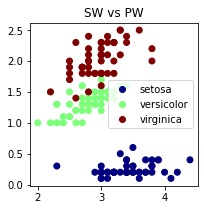

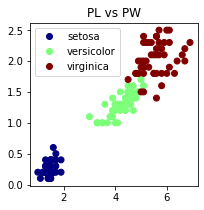

In [39]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,3))
plt.title("SL vs SW")
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap ="jet")
plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

fig = plt.figure(figsize=(3,3))
plt.title("SL vs PL")
scatter = plt.scatter(X[:,0], X[:,2], c=y, cmap ="jet")
plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

fig = plt.figure(figsize=(3,3))
plt.title("SL vs PW")
scatter = plt.scatter(X[:,0], X[:,3], c=y, cmap ="jet")
plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

fig = plt.figure(figsize=(3,3))
plt.title("SW vs PL")
scatter = plt.scatter(X[:,1], X[:,2], c=y, cmap ="jet")
plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

fig = plt.figure(figsize=(3,3))
plt.title("SW vs PW")
scatter = plt.scatter(X[:,1], X[:,3], c=y, cmap ="jet")
plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))


fig = plt.figure(figsize=(3,3))
plt.title("PL vs PW")
scatter = plt.scatter(X[:,2], X[:,3], c=y, cmap ="jet")
plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

plt.show()

#### K-Means perhaps might not be the best suited for this, as the clusters above are not the most circular, and aren't the best seperated either, but we can try. We'll use the last graph (PL vs PW) for reference, because it has the best visual seperation


# Cluster (KMeans)

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

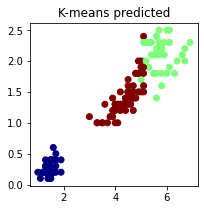

In [75]:
fig = plt.figure(figsize=(3,3))
plt.title("K-means predicted")
scatter = plt.scatter(X[:,2], X[:,3], c=y_pred, cmap ="jet")
# plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

plt.show()

#### Wow, it actually did quite well! Lets see if we can compute an accuracy on this

In [76]:
import numpy as np
from sklearn import metrics

# This function is obtained from https://stackoverflow.com/questions/34047540/python-clustering-purity-metric
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [77]:
from sklearn.metrics import normalized_mutual_info_score

purity = purity_score(y, y_pred)
NMI = normalized_mutual_info_score(y, y_pred)

print("Purity: {:.4f}".format(purity))
print("NMI: {:.4f}".format(NMI))

Purity: 0.8933
NMI: 0.7582


#### Purity is similiar to the "accuracy" measure that we want, since the number of clusters was preset as the same as the number of classes. Lets verify by manually mapping the classes

In [78]:
print(y)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


#### Looks like 0,1,2 gets clustered as 0,2,1

In [80]:
# mapping = np.array([2, 0, 1])
# mapping = np.array([0, 1, 2])
mapping = np.array([0, 2, 1])

y_pred_mapped = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred_mapped

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [81]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_pred_mapped)
print("Accuracy", acc)

Accuracy 0.8933333333333333


# Cluster (Gaussian Mixture Model)

#### Lets see if we can do better with a gaussian mixure model

In [82]:
from sklearn.mixture import GaussianMixture

In [83]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_pred_gmm = gmm.predict(X)

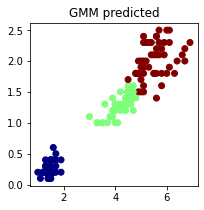

In [84]:
fig = plt.figure(figsize=(3,3))
plt.title("GMM predicted")
scatter = plt.scatter(X[:,2], X[:,3], c=y_pred_gmm, cmap ="jet")
# plt.legend(handles=scatter.legend_elements()[0], labels = list(data.target_names))

plt.show()

#### This looks better than before. Lets check the purity (which equals accuracy in this case)

In [86]:
purity = purity_score(y, y_pred_gmm)
print("Purity", purity)

Purity 0.9666666666666667


#### Indeed, much better!